In [1]:
%pip install pandas numpy plotly seaborn matplotlib scikit-learn

import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler


Note: you may need to restart the kernel to use updated packages.


In [2]:
df = pd.read_excel("..\\Excel Dataset\\2023CDCNaturalFiresDataset.xlsx")

In [3]:
df.head()

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,2010,139,NaN,NaN,NaN,2,Equipment Use,70.0,C,36.766944,-121.303056,CA
1,2010,159,NaN,NaN,NaN,9,Miscellaneous,0.5,B,36.776944,-121.311111,CA
2,2010,163,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.856111,-121.381111,CA
3,2010,165,NaN,NaN,NaN,9,Miscellaneous,0.1,A,36.818056,-121.391111,CA
4,2010,192,NaN,NaN,NaN,9,Miscellaneous,1.0,B,36.883056,-121.561944,CA


## Data Cleaning/Wranging

In [4]:
# Checking for null values
(df.isnull().sum()) / len(df) * 100

FIRE_YEAR            0.000000
DISCOVERY_DOY        0.000000
DISCOVERY_TIME      56.215751
CONT_DOY            57.883604
CONT_TIME           60.703944
STAT_CAUSE_CODE      0.000000
STAT_CAUSE_DESCR     0.000000
FIRE_SIZE            0.000000
FIRE_SIZE_CLASS      0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
STATE                0.000000
dtype: float64

## Feature Engineering

In [5]:
# Defining function to get the month of year
# Transforming DISCOVERY_DOY to the month of year (1-12)
# Leap year is considered for the calculation
def get_month(year, doy):   
    if year % 4 == 0:           
        return (datetime(2000,1,1) + timedelta(days=doy-1)).strftime('%B')        
    else:
        return (datetime(2001,1,1) + timedelta(days=doy-1)).strftime('%B')        
    
# Creating a month field to get the month of year in which the fire was discovered
df['DISCOVERY_Month'] = df.apply(lambda x: get_month(x['FIRE_YEAR'], x['DISCOVERY_DOY']), axis=1)
df['DISCOVERY_Month'] = df['DISCOVERY_Month'].astype('category')

df['DISCOVERY_Month'].unique()


['May', 'June', 'July', 'September', 'March', ..., 'January', 'February', 'April', 'November', 'December']
Length: 12
Categories (12, object): ['April', 'August', 'December', 'February', ..., 'May', 'November', 'October', 'September']

# Correlation Between the Features

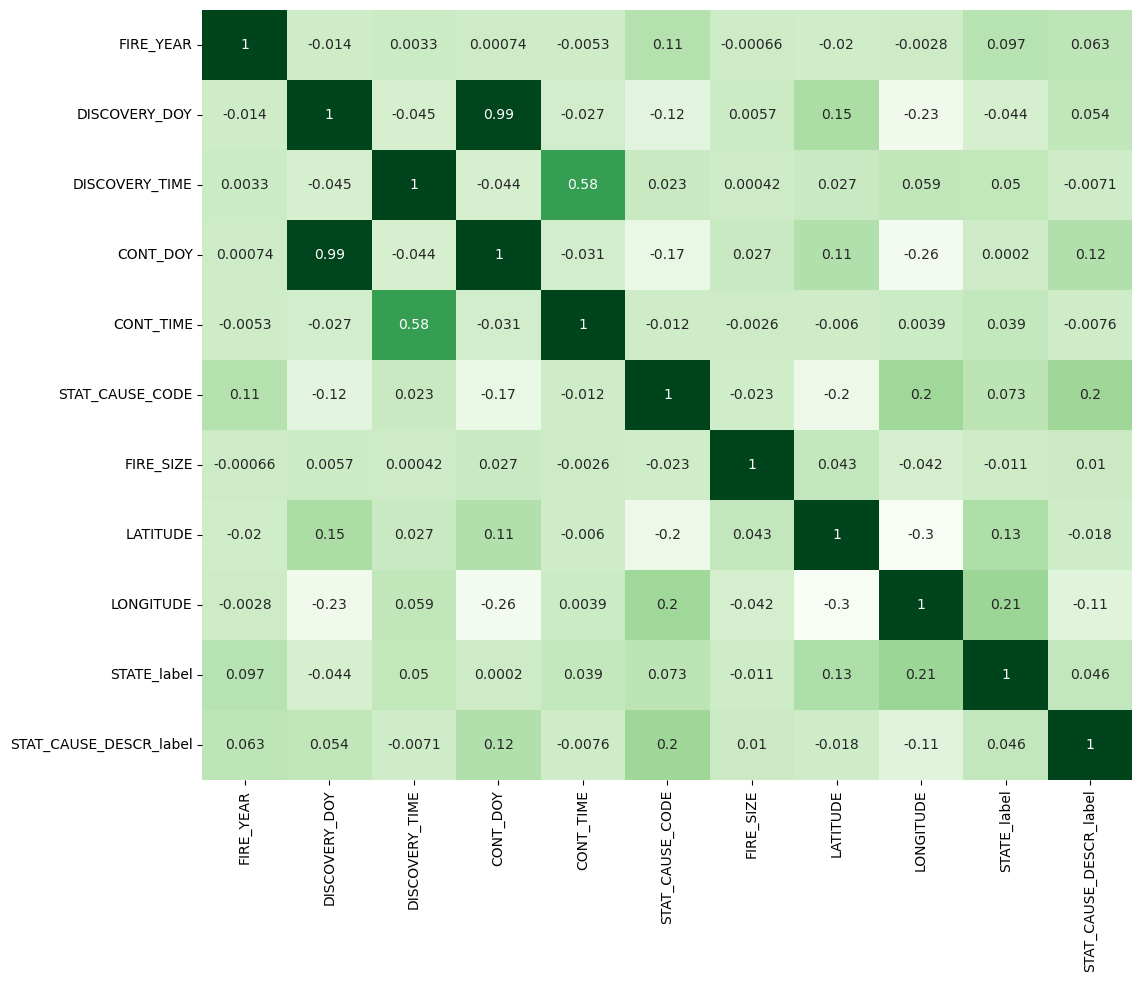

In [6]:
# Label encoding to include categorical data in the heatmap
df['STATE_label'] = df['STATE'].astype('category').cat.codes
df['STAT_CAUSE_DESCR_label'] = df['STAT_CAUSE_DESCR'].astype('category').cat.codes

# Selecting only numeric columns for the heatmap
numeric_df = df.select_dtypes(include=[np.number])

# Heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Greens', cbar=False)

plt.show()

## Data Analysis

Fires by Discovery day of the year by Fire Size

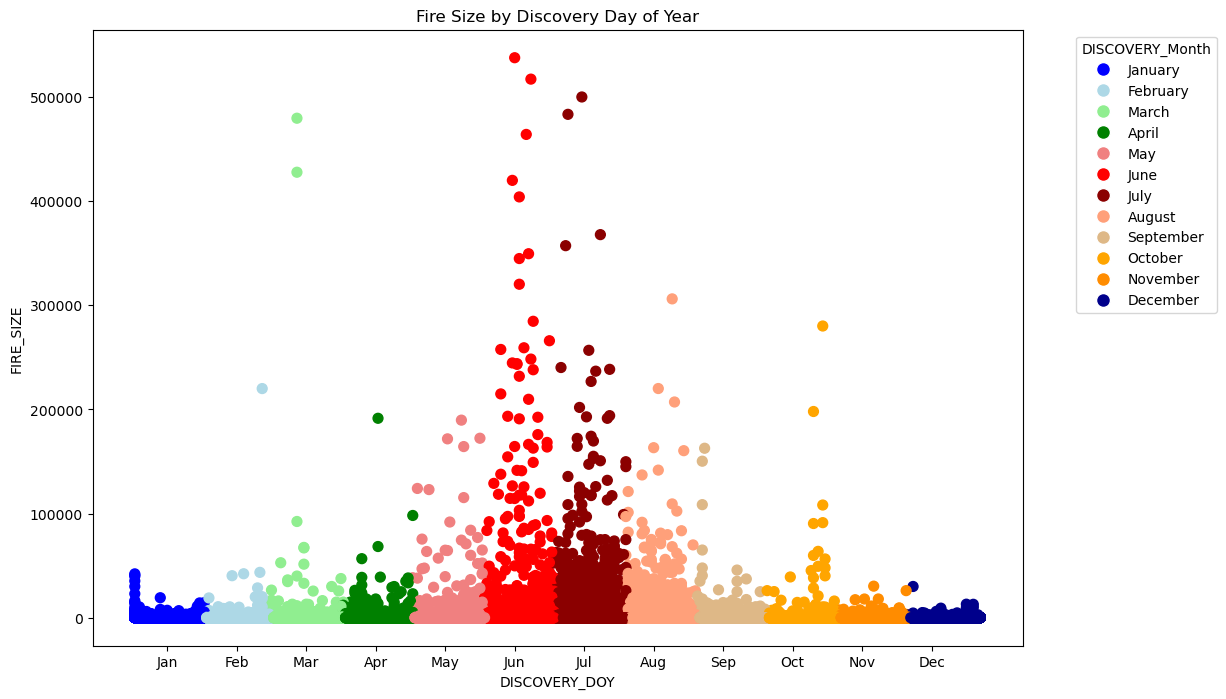

In [7]:
# Define a custom color map for DISCOVERY_Month
month_colors = {
    'January': 'blue', 'February': 'lightblue', 'March': 'lightgreen', 'April': 'green', 'May': 'lightcoral',
    'June': 'red', 'July': 'darkred', 'August': 'lightsalmon',
    'September': 'burlywood', 'October': 'orange', 'November': 'darkorange',
    'December': 'darkblue'
}

# Map the colors to the DISCOVERY_Month column
colors = df['DISCOVERY_Month'].map(month_colors)

# Plot the scatter plot with the custom colors
# Create a scatter plot
# Create a scatter plot with custom month labels on the x-axis
scatplot1 = df.plot.scatter(
    x='DISCOVERY_DOY',
    y='FIRE_SIZE',
    c=colors,
    s=50,
    figsize=(12, 8),
    title='Fire Size by Discovery Day of Year'
)

# Set custom x-axis labels to display months
scatplot1.set_xticks([15, 45, 75, 105, 135, 165, 195, 225, 255, 285, 315, 345])
scatplot1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Create custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in month_colors.values()]
labels = month_colors.keys()
scatplot1.legend(handles, labels, title="DISCOVERY_Month", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

Number of Different Fire Sizes by Years 

                   Range
Class                   
A         0 - 0.25 acres
B       0.26 - 9.9 acres
C        10 - 99.9 acres
D        100 - 299 acres
E        300 - 999 acres
F      1000 - 4999 acres
G            5000+ acres


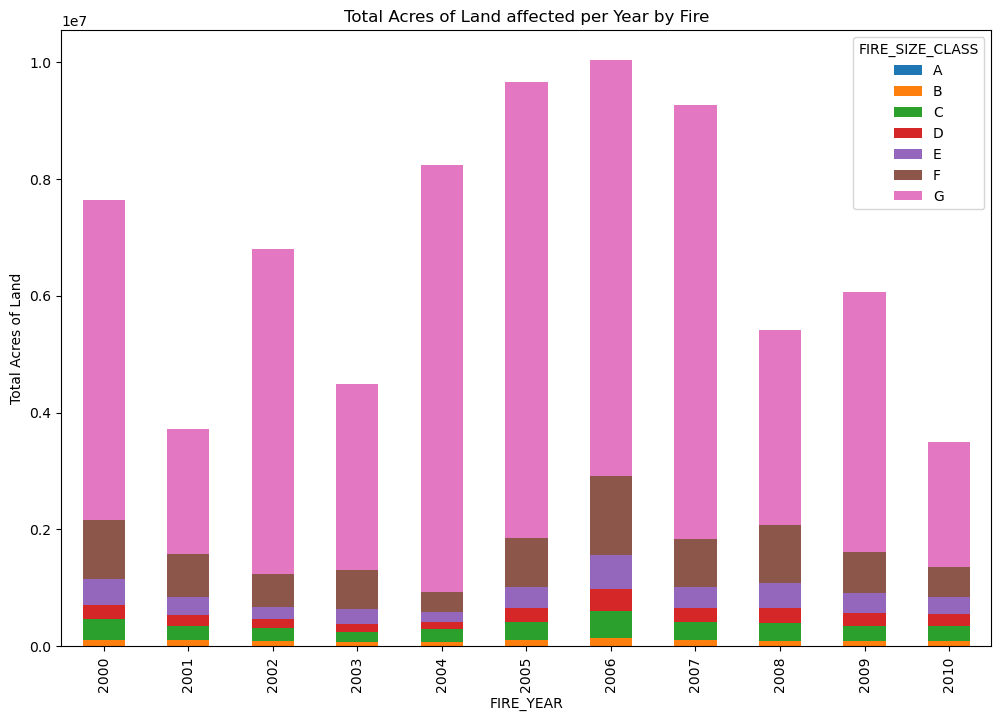

In [8]:
# Define the numerical ranges for FIRE_SIZE_CLASS
# Based on the documentation from fire management agencies
fire_size_class_ranges = {
    'A': '0 - 0.25 acres',
    'B': '0.26 - 9.9 acres',
    'C': '10 - 99.9 acres',
    'D': '100 - 299 acres',
    'E': '300 - 999 acres',
    'F': '1000 - 4999 acres',
    'G': '5000+ acres'
}

# Display the fire size class ranges as a table without the numerical index
fire_size_class_df = pd.DataFrame(list(fire_size_class_ranges.items()), columns=['Class', 'Range'])
fire_size_class_df = fire_size_class_df.set_index('Class')
print(fire_size_class_df)

# Plot the bar graph
df2 = df.groupby(['FIRE_YEAR', 'FIRE_SIZE_CLASS'])['FIRE_SIZE'].sum()
df2 = df2.unstack('FIRE_SIZE_CLASS')
ax = df2.plot.bar(stacked=True, figsize=(12, 8), title='Total Acres of Land affected per Year by Fire')
ax.set_ylabel('Total Acres of Land')


plt.show()

Fires by Month


<Axes: title={'center': 'Number of Fires Incidents by Month'}, xlabel='DISCOVERY_Month'>

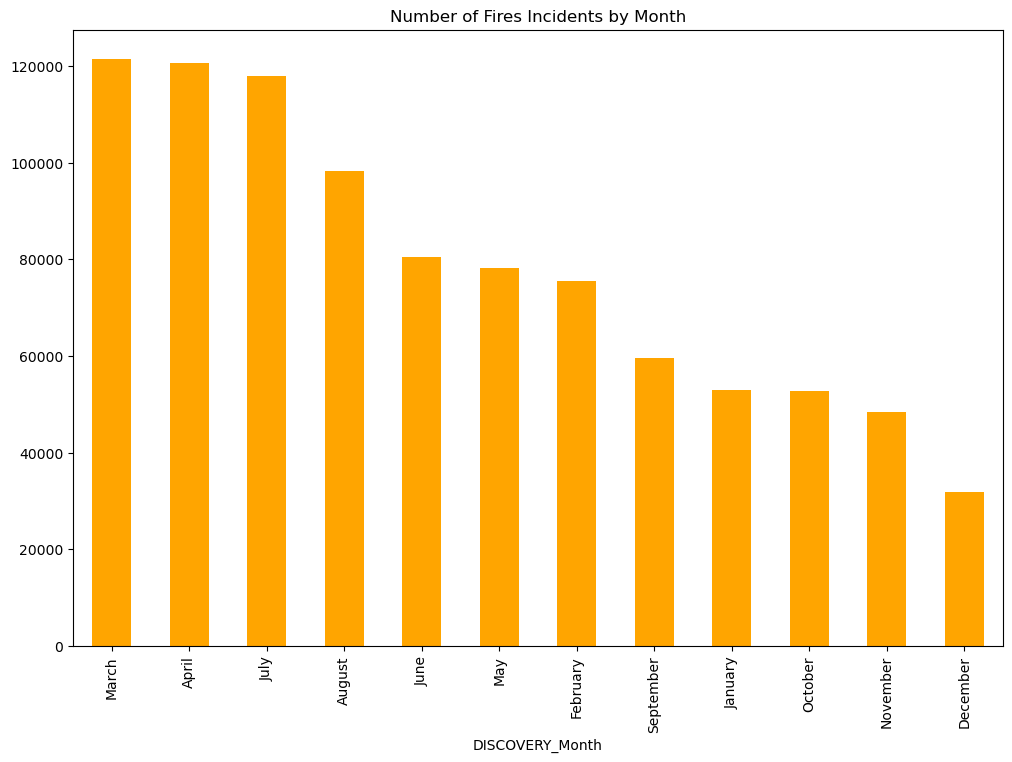

In [9]:
fire_count_by_month = pd.Series(df['DISCOVERY_Month']).value_counts()
fire_count_by_month.plot.bar(figsize=(12, 8), color='orange', title='Number of Fires Incidents by Month')

Number of hours spent to contain fire for each fire size class across years

In [10]:
# Defining a function to format string values of time into proper time format

def format_time(time_float):
    time_int = int(time_float)
    time_str = str(time_int)

    if len(time_str) == 1:
        time_str = '00:0' + time_str[:1]
    elif len(time_str) == 2:
        time_str = '00:' + time_str[:2]
    elif len(time_str) == 3:
        time_str = '0' + time_str[:1] + ':' + time_str[1:]
    elif len(time_str) == 4:
        time_str = time_str[:2] + ':' + time_str[2:]

    time_str_final = time_str + ':00'
    time_obj = datetime.strptime(time_str_final, '%H:%M:%S')
    return time_obj.time()

# Convert day of year to a valid date
def get_valid_date(year, day_of_year):
	return datetime(year, 1, 1) + timedelta(days=day_of_year - 1)

def difference_in_hours_between_two_datetime_obj(datetime_obj1, datetime_obj2):
    result = (datetime_obj2 - datetime_obj1).total_seconds() / 3600
    return round(result, 2)



In [11]:
# Creating a new dataframe by eliminating the rows with null values in the columns 'DISCOVERY_TIME', 'CONT_DOY', and 'CONT_TIME'

df_fire_contained = df.dropna(subset=['DISCOVERY_TIME', 'CONT_DOY', 'CONT_TIME'])

df_fire_contained.head()


,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISCOVERY_Month,STATE_label,STAT_CAUSE_DESCR_label
1388,2010,135,639.0,136.0,639.0,5,Debris Burning,0.2,A,64.116669,-145.666672,AK,May,0,3
1389,2010,135,613.0,136.0,613.0,5,Debris Burning,0.1,A,64.066666,-145.616669,AK,May,0,3
1392,2010,135,832.0,136.0,834.0,5,Debris Burning,0.2,A,61.583332,-149.550003,AK,May,0,3
1407,2010,174,1838.0,179.0,2320.0,1,Lightning,2777.0,F,65.760834,-162.574448,AK,June,0,6
1463,2010,280,638.0,283.0,645.0,13,Missing/Undefined,0.1,A,64.900002,-147.733337,AK,October,0,8


In [12]:
df_fire_contained['DISCOVERY_TIME_CLOCK'] = df_fire_contained['DISCOVERY_TIME'].apply(lambda row: format_time(row))

df_fire_contained['CONT_TIME_CLOCK'] = df_fire_contained['CONT_TIME'].apply(lambda row: format_time(row))

df_fire_contained['DATETIME_START'] = df_fire_contained.apply(lambda row: get_valid_date(row['FIRE_YEAR'], row['DISCOVERY_DOY']).replace(hour=row['DISCOVERY_TIME_CLOCK'].hour, minute=row['DISCOVERY_TIME_CLOCK'].minute), axis=1)

df_fire_contained['DATETIME_FINISH'] = df_fire_contained.apply(lambda row: get_valid_date(row['FIRE_YEAR'], row['CONT_DOY']).replace(hour=row['CONT_TIME_CLOCK'].hour, minute=row['CONT_TIME_CLOCK'].minute), axis=1)

df_fire_contained['HOURS_TO_CONTAIN'] = df_fire_contained.apply(lambda row: difference_in_hours_between_two_datetime_obj(row['DATETIME_START'], row['DATETIME_FINISH']), axis=1)

df_fire_contained.head()

C:\Users\david\AppData\Local\Temp\ipykernel_23692\2861966340.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_contained['DISCOVERY_TIME_CLOCK'] = df_fire_contained['DISCOVERY_TIME'].apply(lambda row: format_time(row))
C:\Users\david\AppData\Local\Temp\ipykernel_23692\2861966340.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fire_contained['CONT_TIME_CLOCK'] = df_fire_contained['CONT_TIME'].apply(lambda row: format_time(row))
C:\Users\david\AppData\Local\Temp\ipykernel_23692\2861966340.py:

,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,CONT_DOY,CONT_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE,DISCOVERY_Month,STATE_label,STAT_CAUSE_DESCR_label,DISCOVERY_TIME_CLOCK,CONT_TIME_CLOCK,DATETIME_START,DATETIME_FINISH,HOURS_TO_CONTAIN
1388,2010,135,639.0,136.0,639.0,5,Debris Burning,0.2,A,64.116669,-145.666672,AK,May,0,3,06:39:00,06:39:00,2010-05-15 06:39:00,2010-05-16 06:39:00,24.00
1389,2010,135,613.0,136.0,613.0,5,Debris Burning,0.1,A,64.066666,-145.616669,AK,May,0,3,06:13:00,06:13:00,2010-05-15 06:13:00,2010-05-16 06:13:00,24.00
1392,2010,135,832.0,136.0,834.0,5,Debris Burning,0.2,A,61.583332,-149.550003,AK,May,0,3,08:32:00,08:34:00,2010-05-15 08:32:00,2010-05-16 08:34:00,24.03
1407,2010,174,1838.0,179.0,2320.0,1,Lightning,2777.0,F,65.760834,-162.574448,AK,June,0,6,18:38:00,23:20:00,2010-06-23 18:38:00,2010-06-28 23:20:00,124.70
1463,2010,280,638.0,283.0,645.0,13,Missing/Undefined,0.1,A,64.900002,-147.733337,AK,October,0,8,06:38:00,06:45:00,2010-10-07 06:38:00,2010-10-10 06:45:00,72.12


In [13]:
df_fire_contained_final = df_fire_contained[['STAT_CAUSE_DESCR', 'FIRE_SIZE','FIRE_SIZE_CLASS','STATE','DATETIME_START','DATETIME_FINISH', 'HOURS_TO_CONTAIN']]
df_fire_contained_final.head()

,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,STATE,DATETIME_START,DATETIME_FINISH,HOURS_TO_CONTAIN
1388,Debris Burning,0.2,A,AK,2010-05-15 06:39:00,2010-05-16 06:39:00,24.00
1389,Debris Burning,0.1,A,AK,2010-05-15 06:13:00,2010-05-16 06:13:00,24.00
1392,Debris Burning,0.2,A,AK,2010-05-15 08:32:00,2010-05-16 08:34:00,24.03
1407,Lightning,2777.0,F,AK,2010-06-23 18:38:00,2010-06-28 23:20:00,124.70
1463,Missing/Undefined,0.1,A,AK,2010-10-07 06:38:00,2010-10-10 06:45:00,72.12


In [14]:
df_fire_contained_average_time_lapse = df_fire_contained.groupby(['FIRE_YEAR','FIRE_SIZE_CLASS'])['HOURS_TO_CONTAIN'].mean()
df_fire_contained_average_time_lapse = df_fire_contained_average_time_lapse.unstack('FIRE_SIZE_CLASS')

df_fire_contained_average_time_lapse.head()

FIRE_SIZE_CLASS,A,B,C,D,E,F,G
FIRE_YEAR,,,,,,,
2000,14.582937,14.230623,46.201558,105.956620,164.508413,362.635049,703.019087
2001,11.441699,9.601865,18.399035,100.930020,149.097386,297.918278,436.493214
2002,11.427987,10.358667,34.285862,108.754820,179.272943,312.706413,948.769037
2003,17.588272,18.502715,47.769148,119.149854,324.425083,574.659912,1035.459099
2004,14.246771,10.664277,27.974980,87.704083,202.441551,438.578803,1500.120495


<Axes: title={'center': 'Average Time to Contain Fire by Year and Fire Size Class'}, xlabel='FIRE_YEAR', ylabel='Average Time (in hours)'>

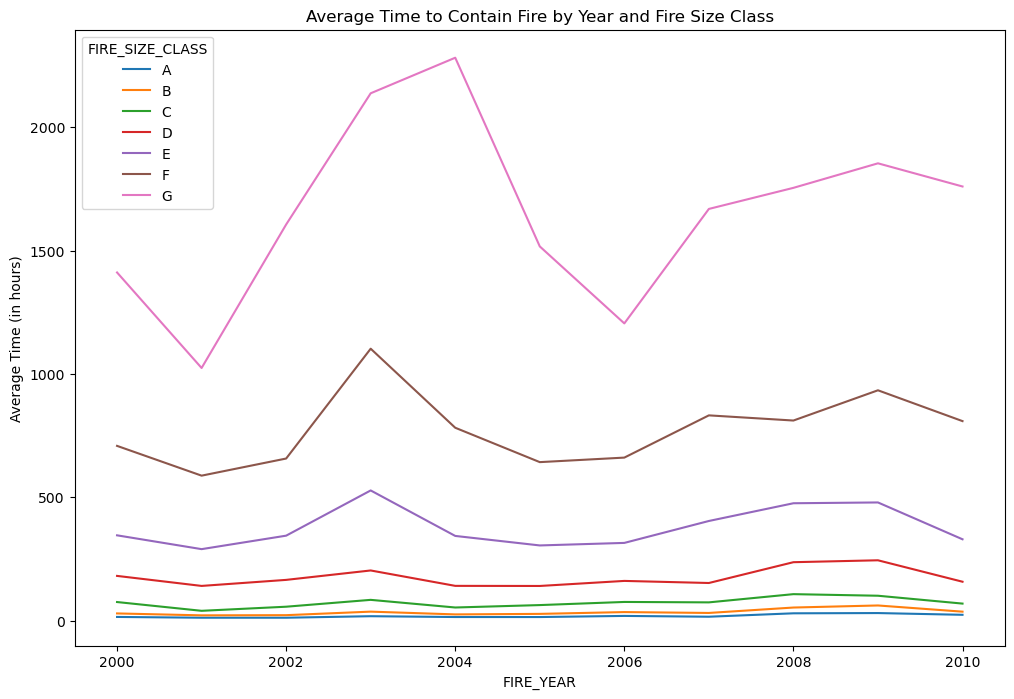

In [15]:
df_fire_contained_average_time_lapse.plot.line(stacked=True, figsize=(12, 8), title='Average Time to Contain Fire by Year and Fire Size Class', ylabel='Average Time (in hours)')